In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [10]:
import os

plots_dir = "plots/"

if not os.path.isdir(plots_dir):
    os.makedirs(plots_dir)

In [3]:
airTemperature = ctrl.Antecedent(np.arange(0, 45 + 1, 0.1), 'Air Temperature')
humidity = ctrl.Antecedent(np.arange(0, 100 + 1), 'Humidity')
delay = ctrl.Consequent(np.arange(0, 45 + 1), 'Spraying Delay')

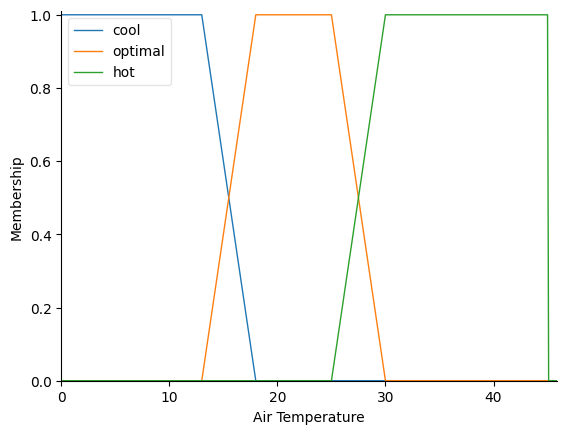

In [3]:
airTemperature['cool'] = fuzz.trapmf(airTemperature.universe, [0, 0, 13, 18])
airTemperature['optimal'] = fuzz.trapmf(airTemperature.universe, [13, 18, 25, 30])
airTemperature['hot'] = fuzz.trapmf(airTemperature.universe, [25, 30, 45, 45])
airTemperature.view()

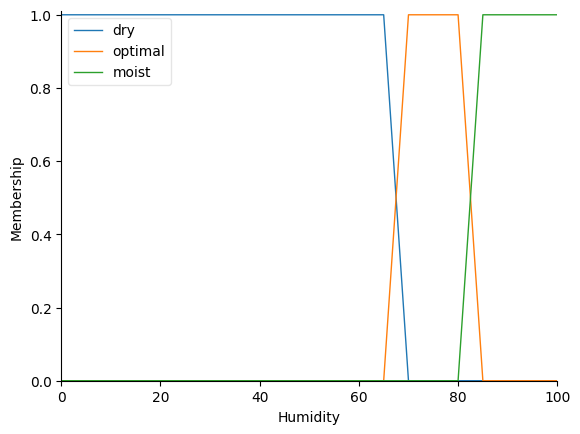

In [4]:
humidity['dry'] = fuzz.trapmf(humidity.universe, [0, 0, 65, 70])
humidity['optimal'] = fuzz.trapmf(humidity.universe, [65, 70, 80, 85])
humidity['moist'] = fuzz.trapmf(humidity.universe, [80, 85, 100, 100])
humidity.view()

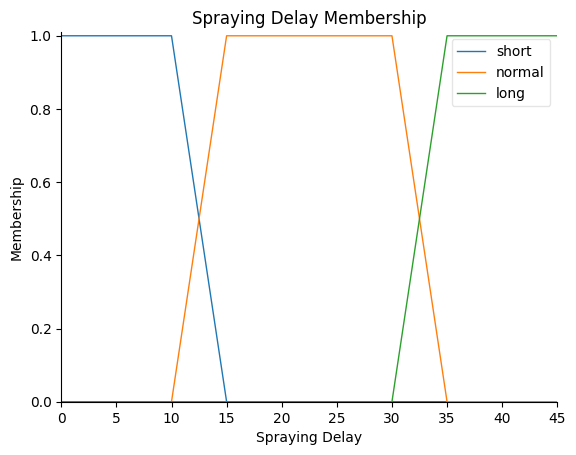

In [11]:
delay['short'] = fuzz.trapmf(delay.universe, [0, 0, 10, 15])
delay['normal'] = fuzz.trapmf(delay.universe, [10, 15, 30, 35])
delay['long'] = fuzz.trapmf(delay.universe, [30, 35, 45, 45])
delay.view()
plt.title("Spraying Delay Membership")
plt.savefig("plots/Spraying Delay Membership.png")
plt.show()

In [6]:
rule1 = ctrl.Rule(airTemperature['hot'] & humidity['dry'], delay['short'])
rule2 = ctrl.Rule(airTemperature['hot'] & humidity['optimal'], delay['short'])
rule3 = ctrl.Rule(airTemperature['hot'] & humidity['moist'], delay['normal'])
rule4 = ctrl.Rule(airTemperature['optimal'] & humidity['dry'], delay['short'])
rule5 = ctrl.Rule(airTemperature['optimal'] & humidity['optimal'], delay['normal'])
rule6 = ctrl.Rule(airTemperature['optimal'] & humidity['moist'], delay['normal'])
rule7 = ctrl.Rule(airTemperature['cool'] & humidity['dry'], delay['normal'])
rule8 = ctrl.Rule(airTemperature['cool'] & humidity['optimal'], delay['normal'])
rule9 = ctrl.Rule(airTemperature['cool'] & humidity['moist'], delay['long'])

In [7]:
spraying_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

spraying_delay = ctrl.ControlSystemSimulation(spraying_ctrl)


Air temperature	: 30.04
Humidity	: 75.68

Spraying Delay : 6.333333333333334


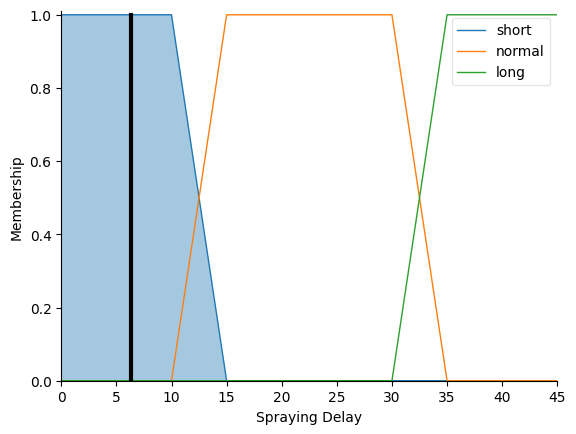

In [8]:
airTemperatureRandom = 30.04
humidityRandom = 75.68

spraying_delay.input['Air Temperature'] = airTemperatureRandom
spraying_delay.input['Humidity'] = humidityRandom

print(f"""
Air temperature\t: {airTemperatureRandom}
Humidity\t: {humidityRandom}
""")

spraying_delay.compute()

print(f"Spraying Delay : {spraying_delay.output['Spraying Delay']}")
delay.view(sim=spraying_delay)